In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1.Load the data file using pandas.

In [182]:
df = pd.read_csv("/content/googleplaystore.csv")


In [183]:
df.shape

(10841, 13)

In [184]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## 2.Check for null values in the data. Get the number of null values for each column.


In [185]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#3.Drop records with nulls in any of the columns.

In [186]:
df1 = df.dropna()
#the data that has null values in the columns get removed

In [187]:
df1.shape
#the number of elements in each dimensions

(9360, 13)

In [188]:
print(df1.isna().sum())
#it will return the total number of null values in the dataframe

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


#4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them:
  1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric:
      
        i).	Extract the numeric value from the column

        ii).	Multiply the value by 1,000, if size is mentioned in Mb


In [189]:
#4.1.i)

def convert_size(size):
  if 'Mb' in size:
        return float(size.replace('Mb', '').strip()) * 1000  # Convert Mb to Kb
  elif 'Kb' in size:
        return float(size.replace('Kb', '').strip())
  else:
        return None
df['Size(Kb)'] = df['Size'].apply(convert_size)
print(df)
print('*'*100)
numeric_sizes = df['Size(Kb)']
print(numeric_sizes)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [190]:
#4.1.ii)

df1['Size(Kb)'] = df1['Size'].apply(lambda x: float(x.replace('Mb', '').strip()) * 1000 if 'Mb' in x else float(x.replace('Kb', '').strip()) if 'Kb' in x else None)
print(df1)
print('*'*100)
numeric_sizes = df['Size(Kb)']
print(numeric_sizes)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

<ipython-input-190-e98e95f5cb1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Size(Kb)'] = df1['Size'].apply(lambda x: float(x.replace('Mb', '').strip()) * 1000 if 'Mb' in x else float(x.replace('Kb', '').strip()) if 'Kb' in x else None)


2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [191]:
#4.2

df1['Reviews'] = pd.to_numeric(df1['Reviews'], errors='coerce').astype('Int64')
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

<ipython-input-191-b366d7b2155e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'] = pd.to_numeric(df1['Reviews'], errors='coerce').astype('Int64')


3.	Installs field is currently stored as string and has values like 1,000,000+.
  1.	Treat 1,000,000+ as 1,000,000
  2.	remove ‘+’, ‘,’ from the field, convert it to integer


In [192]:
df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '')
df1["Installs"] = pd.to_numeric(df1.Installs)
df1["Installs"].dtype

<ipython-input-192-1c686e6cb046>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '')
<ipython-input-192-1c686e6cb046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '')
<ipython-input-192-1c686e6cb046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

dtype('int64')

In [193]:
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

4.	Price field is a string and has $ symbol. Remove $ sign, and convert it to numeric.

> Indented block



In [194]:
df1['Price'] = df1['Price'].str.replace('$', '')
df1["Price"] = pd.to_numeric(df1.Price)
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

<ipython-input-194-5502a0e70ddf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1['Price'].str.replace('$', '')
<ipython-input-194-5502a0e70ddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price'] = df1['Price'].str.replace('$', '')
<ipython-input-194-5502a0e70ddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price


**5. Sanity checks:**

  i.Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.


In [195]:
df1 = df1[(df1.Rating>=1) & (df1.Rating<=5)]
df1["Rating"]
#here the rating column should be greater than or equal 1 and less thsn 5 '&' operator is used to combine both the values

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [196]:
df1.head(5)
#displays the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None


In [197]:
len(df1.index)
#number of datasets remaining after removing the ones having ratings not between 1 and 5

9360

ii.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [198]:
df1.drop(df1.index[df1.Reviews>df1.Installs],axis=0,inplace=True)
#used to drop rows specified by their indices.

In [199]:
len(df1.index)
#determine the size or length of data structures

9353

In [200]:
#built in python module which ignores warnings
"""
import warnings
warnings.filterwarnings('ignore')
"""


"\nimport warnings\nwarnings.filterwarnings('ignore')\n"

In [201]:
df1[(df1["Type"]=="Free") & (df1["Price"]>0)]  #since there are no such data, hence nothing is dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)


In [202]:
len(df1.index)
 #determine the size or length of data structures

9353

#5. Performing univariate analysis:


##•	`Boxplot for Price`

•	Are there any outliers? Think about the price of usual apps on Play Store.

	Boxplot for Reviews #boxplots are used for showing the distribution of data points across a selected measure. In this case "Reviews"
•	Are there any apps with very high number of reviews? Do the values seem right?

	Histogram for Rating #histogram are used to summarize discrete or continuous data that are measured on an interval scale.In this case "Rating"
•	How are the ratings distributed? Is it more toward higher ratings?

	Histogram for Size #histogram are used to summarize discrete or continuous data that are measured on an interval scale.
Note down your observations for the plots made above. Which of these seem to have outliers?

A histogram groups the data into ranges and then plots the frequency that data occurs in each range. A box plot is used to compare multiple groups of data, and it shows the median, interquartile range, and maximum and minimum values of the data


#6. Outlier Treatment
##  1. Boxplot for Price


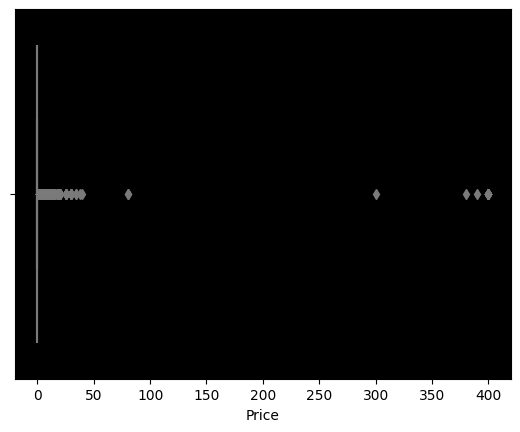

In [203]:
sns.boxplot(x="Price",data=df1, palette = 'pastel')
sns.set_style(rc = {'axes.facecolor': 'black'})


•	Are there any outliers? Think about the price of usual apps on Play Store

In [204]:
std = np.std(df1.Price)
mean = np.mean(df1.Price)
outlier_uplimit = mean + 3*std
print(outlier_uplimit)

48.44154573100313


In [205]:
len(df1[(df1["Price"]>outlier_uplimit)])

17

In [206]:
df1[(df1["Price"]>outlier_uplimit)]  #list of apps with high prices

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up,None
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up,None
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,None
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,None
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,None
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,None
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,None
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,None
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,None
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,None


# `Boxplot for Reviews`

  2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.





In [207]:
std2 = np.std(df1.Reviews)
mean2 = np.mean(df1.Reviews)
outlier_uplimit_2 = mean2 + 3*std2
print(outlier_uplimit_2)

9952762.231132139


In [208]:
len(df1[(df1["Reviews"]>outlier_uplimit_2)])

92

In [209]:
df1[(df1["Reviews"]>outlier_uplimit_2)].tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(Kb)
4122,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790092,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device,None
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,None
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,Varies with device,100000000,Free,0.0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,None
4676,Viber Messenger,COMMUNICATION,4.3,11335481,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,None
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device,None
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,Varies with device,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up,None
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,None
7937,Shadow Fight 2,GAME,4.6,10981850,88M,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up,None
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15M,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up,None
8896,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633,14M,100000000,Free,0.0,Everyone,Tools,"June 5, 2018",4.8.7.8,4.0 and up,None


3.	Installs:  There seems to be some outliers in this field
too. Apps having very high number of installs should be dropped from the analysis.
  1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
  2.	Decide a threshold as cutoff for outlier and drop records having values more than that


<Axes: xlabel='Installs'>

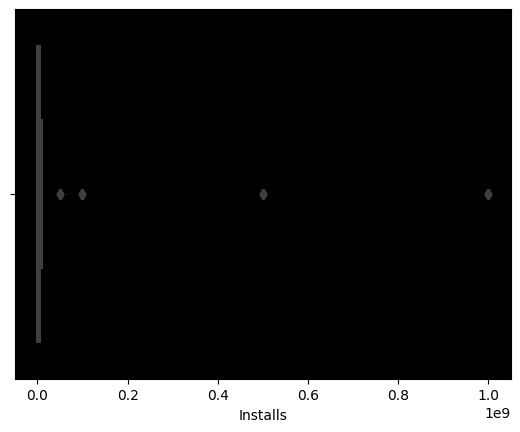

In [210]:
sns.boxplot(x="Installs",data=df1)

In [211]:

print(np.percentile(df1["Installs"],10))
print(np.percentile(df1["Installs"],25))
print(np.percentile(df1["Installs"],50))
print(np.percentile(df1["Installs"],70))
print(np.percentile(df1["Installs"],90))
print(np.percentile(df1["Installs"],99))

1000.0
10000.0
500000.0
5000000.0
10000000.0
500000000.0


<ipython-input-212-347eaeccab45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Installs"])


<Axes: xlabel='Installs', ylabel='Density'>

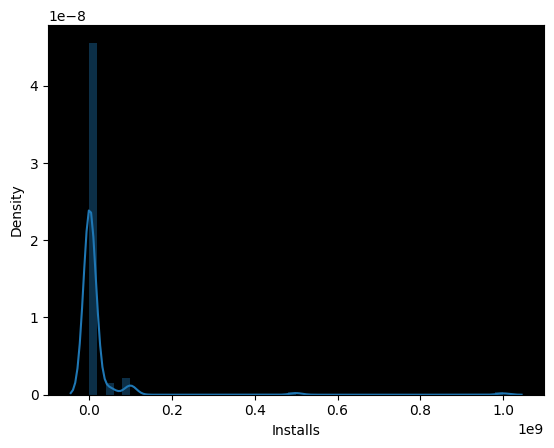

In [212]:
sns.distplot(df1["Installs"])

In [213]:
len(df1[df1.Installs>=100000000.0])

539

In [214]:
df1.drop(df1.index[df1.Installs>=100000000.0],inplace=True)
len(df1.index)

8814

#7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

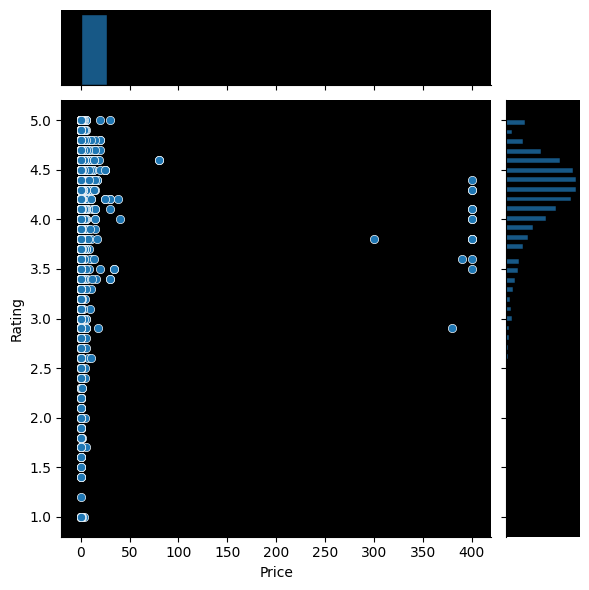

In [215]:
# Make scatter plot/joinplot for Rating vs. Price
sns.jointplot(x="Price",y="Rating",data=df1)

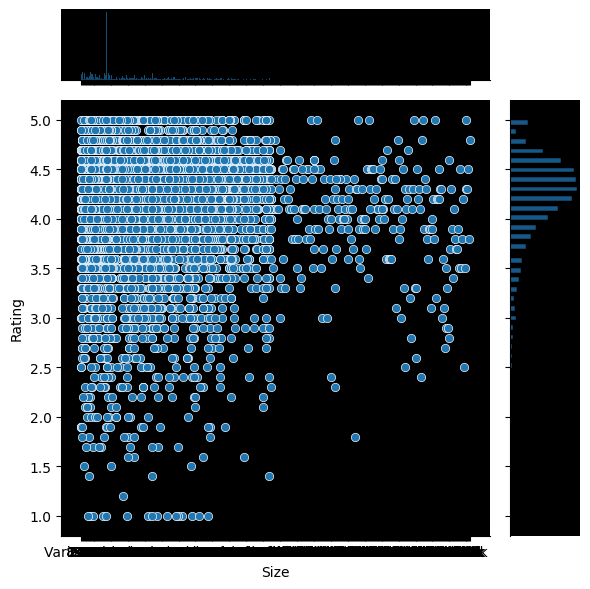

In [216]:
# Make scatter plot/joinplot for Rating vs Size
sns.jointplot(x="Size",y="Rating",data=df1)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


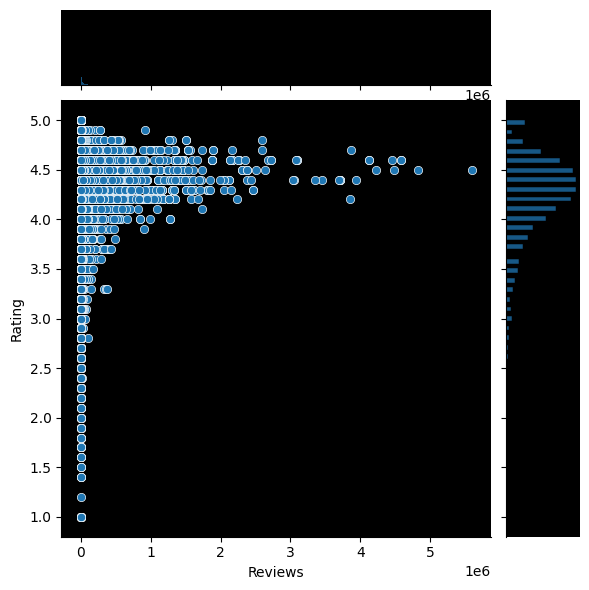

In [217]:
# Make scatter plot/joinplot for Rating vs. Reviews
sns.jointplot(x="Reviews",y="Rating",data=df1)

In [218]:
# Does more review mean a better rating always?
df1.corr()

<ipython-input-218-0768bacd1699>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.140847,0.104293,-0.020668
Reviews,0.140847,1.000000,0.712962,-0.019135
Installs,0.104293,0.712962,1.000000,-0.024953
Price,-0.020668,-0.019135,-0.024953,1.000000


In [219]:
# Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?
df1["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<Axes: xlabel='Rating', ylabel='Content Rating'>

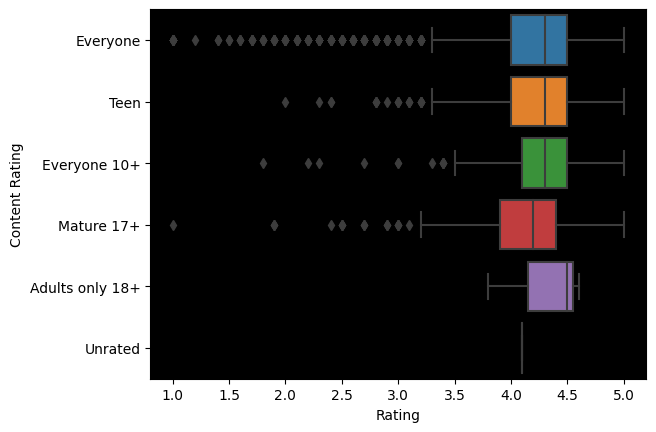

In [220]:
sns.boxplot(x="Rating",y="Content Rating",data=df1)
#shows the distribution of quantitative data in away that shows the comparision between variables

<Axes: xlabel='Rating', ylabel='Category'>

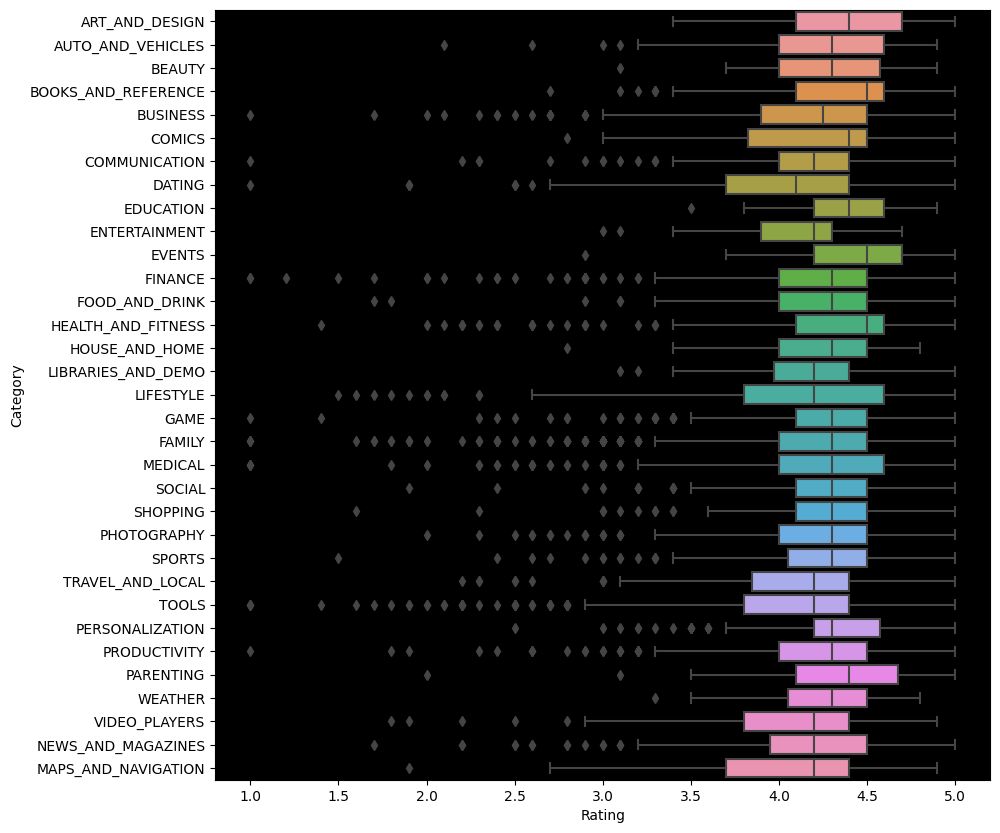

In [221]:
plt.figure(figsize=(10,10)) #creates a new figure objects,figsize displays the width size and height size
sns.boxplot(x="Rating",y="Category",data=df1)


#8. Data preprocessing

 For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

 Reviews and Install have some values that are still relatively very high. Before building a linear regression model,
 you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical
 data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe
 should be inp2.

In [222]:
inp1 = df1.copy()

In [223]:
# Apply log transformation to 'Reviews' and 'Installs'
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

In [224]:
# Drop unnecessary columns
columns_to_drop = ['App', 'Last Updated', 'Current Ver', 'Android Ver']
inp1.drop(columns=columns_to_drop, inplace=True)

In [225]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8814 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8814 non-null   object 
 1   Rating          8814 non-null   float64
 2   Reviews         8814 non-null   Float64
 3   Size            8814 non-null   object 
 4   Installs        8814 non-null   float64
 5   Type            8814 non-null   object 
 6   Price           8814 non-null   float64
 7   Content Rating  8814 non-null   object 
 8   Genres          8814 non-null   object 
 9   Size(Kb)        0 non-null      object 
dtypes: Float64(1), float64(3), object(6)
memory usage: 766.1+ KB


In [226]:
# Get dummy columns for 'Category', 'Genres', and 'Content Rating' using pd.get_dummies
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'], drop_first=True)

In [227]:
print(inp2.head())

   Rating    Reviews  Size   Installs  Type  Price Size(Kb)  \
0     4.1   5.075174   19M   9.210440  Free    0.0     None   
1     3.9   6.875232   14M  13.122365  Free    0.0     None   
2     4.7   11.37952  8.7M  15.424949  Free    0.0     None   
3     4.5  12.281389   25M  17.727534  Free    0.0     None   
4     4.3   6.875232  2.8M  11.512935  Free    0.0     None   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                           0                0                             0   
1                           0                0                             0   
2                           0                0                             0   
3                           0                0                             0   
4                           0                0                             0   

   ...  Genres_Video Players & Editors  \
0  ...                               0   
1  ...                               0   
2  ...        

In [228]:
inp2.head(2)

,Rating,Reviews,Size,Installs,Type,Price,Size(Kb),Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19M,9.210440,Free,0.0,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14M,13.122365,Free,0.0,None,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [229]:
y = inp2.iloc[:,0] #target

In [230]:
X=inp2.iloc[:,1:] #features

# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.


In [231]:
# Step 1: Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

# You can choose which columns to include in X (features) and y (target variable)
# For this example, let's use 'Rating' as the target variable (y).
X = df.drop(columns=['Rating'])  # Features
y = df['Rating']  # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create new dataframes for training and testing data
df_train = pd.concat([X_train, y_train], axis=1)  # Combine features and target for training
df_test = pd.concat([X_test, y_test], axis=1)  # Combine features and target for testing


#10. Separate the dataframes into X_train, y_train, X_test, and y_test.


In [232]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the data


# Data preprocessing and cleaning (if needed)
# For example, you might want to remove or fill missing values, handle categorical data, etc.

# Let's assume you want to predict the 'Rating' column, so set it as the target variable (y)
y = df['Rating']

# Remove the 'Rating' column from the dataframe to create the feature matrix (X)
X = df.drop('Rating', axis=1)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have separated dataframes:
# - X_train: Features for training
# - y_train: Target values for training
# - X_test: Features for testing
# - y_test: Target values for testing

#11.Model building
Use linear regression as the technique

Report the R2 on the train set


R-squared (R2) on the training set: 0.02066882941951753




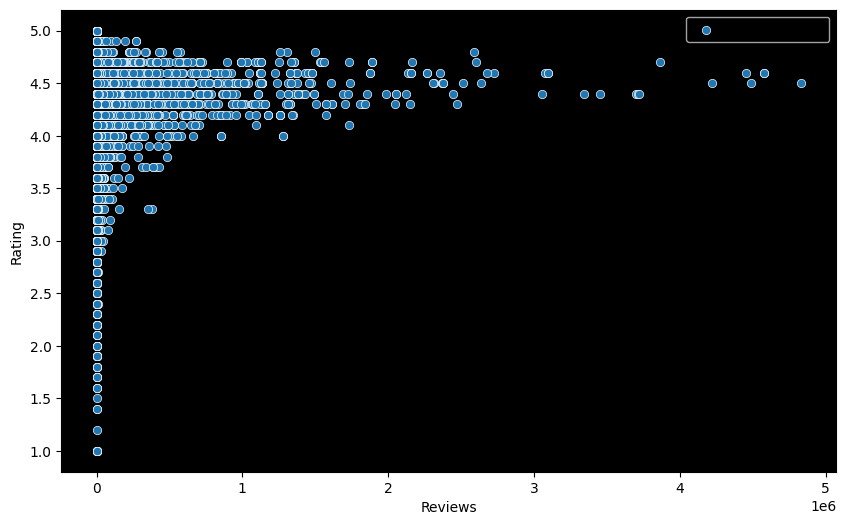

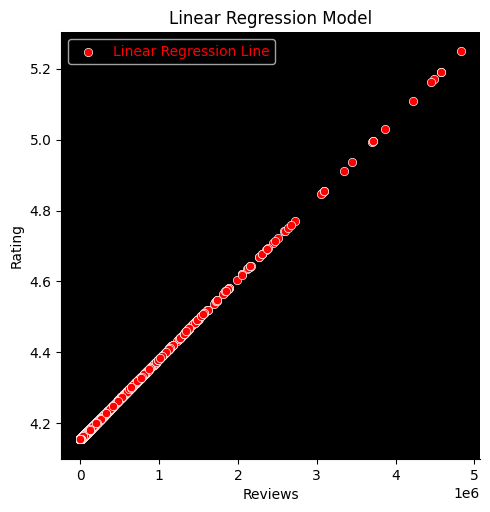

In [233]:
# Import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
 #r2_score is coefficient of a statistical measure that evaluates the performance of linear regression model.

# Data preprocessing (cleaning and feature selection)
# For this example, let's use 'Reviews' as the feature and 'Rating' as the target variable.
X = df1[['Reviews']]  # Feature
y = df1['Rating']  # Target variable

# Perform the train-test split with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the R2 score on the training set
r2_train = r2_score(y_train, y_train_pred)
print("R-squared (R2) on the training set:", r2_train)
print("\n")

# Optional: Visualize the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Reviews'], y=y_train, label='Actual Rating')
sns.relplot(x=X_train['Reviews'], y=y_train_pred, color='red', label='Linear Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.legend(labelcolor='Red')
plt.show()



# In this code:
# We load the dataset into a DataFrame named df.
# We select 'Reviews' as the feature and 'Rating' as the target variable for the linear regression model.
# We perform a train-test split with a 70-30 ratio.
# We create a linear regression model, fit it on the training data, and make predictions on the training set.
# We calculate and print the R-squared (R2) score on the training set, which measures the goodness of fit for the model.
# You can adjust the feature and target variable according to your specific requirements. Additionally, the code includes an optional step to visualize the data and the regression line using Seaborn and Matplotlib.

#12.Make predictions on the test set and report R2

R-squared (R2) on the training set: 0.01793034021219575




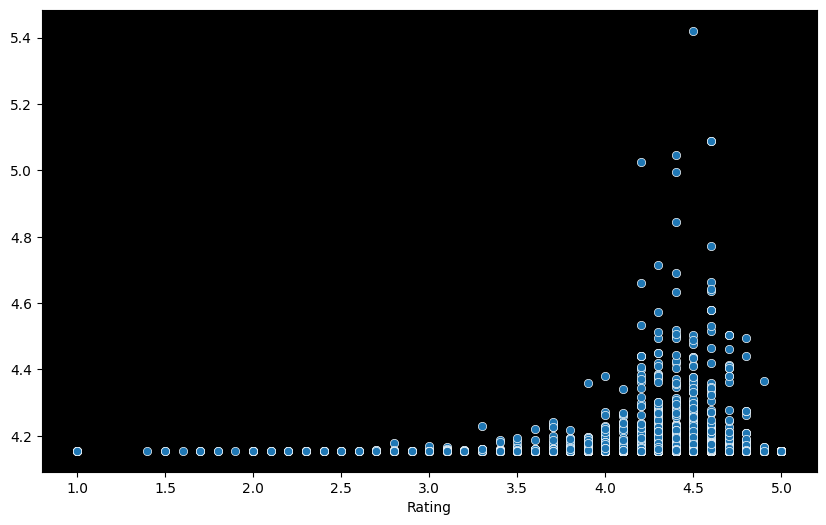

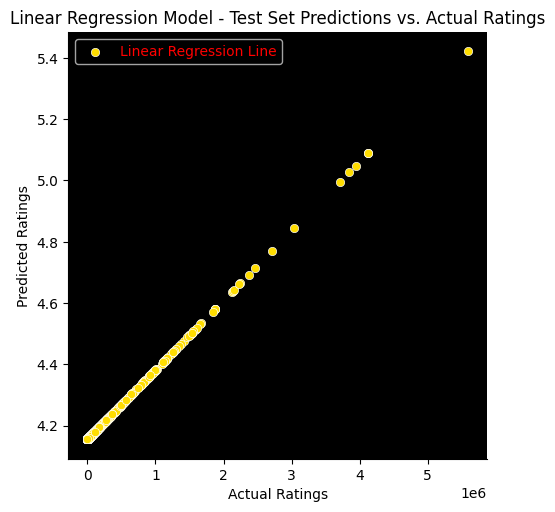

In [234]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Data preprocessing (cleaning and feature selection)
# For this example, let's use 'Reviews' as the feature and 'Rating' as the target variable.
X = df1[['Reviews']]  # Feature
y = df1['Rating']  # Target variable

# Perform the train-test split with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_test_pred = model.predict(X_test)

# Calculate the R2 score on the training set
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (R2) on the training set:", r2_test)
print("\n")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)

sns.relplot(x=X_test['Reviews'], y=y_test_pred, color='#ffdd00', label='Linear Regression Line')

plt.title('Linear Regression Model - Test Set Predictions vs. Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend(labelcolor='Red')
plt.show()

# We create a linear regression model, fit it on the training data, and make predictions on the test set.
# We calculate and print the R-squared (R2) score on the test set, which measures the goodness of fit for the model.
# Additionally, the code includes an optional step to visualize the predictions on the test set using Seaborn and Matplotlib.